In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile
import root_numpy as rn
import numpy as np
import pandas as pd
import math

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.10.2 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
#MC BNB + Cosmics 
fmcc8 ='treeTestpandoraNu_pandoraNu.root'
a = rn.root2array(fmcc8,treename='tree')
df = pd.DataFrame(a)
#df = df0.query('sample == 2')
#df = df0[249:-249]

fmcc7 ='treeTest_mcc7_pandoraNu_pandoraNu.root'
amcc7 = rn.root2array(fmcc7,treename='tree')
dfmcc70 = pd.DataFrame(amcc7)

dfmcc7 = dfmcc70.query('sample==3')

In [264]:
df['vtxdiff'] = np.sqrt(pow(df.mc_vtx_x - df.reco_vtx_x,2) + \
                     pow(df.mc_vtx_y - df.reco_vtx_y,2) + \
                     pow(df.mc_vtx_z - df.reco_vtx_z,2) )

df['calc_len'] = np.sqrt(pow(df.start_x - df.end_x,2) + \
                     pow(df.start_y - df.end_y,2) + \
                     pow(df.start_z - df.end_z,2) )

df['len_diff'] = df['len'] - df['calc_len'] 


df_mult1 = df.query('mult == 1')
df_mult2 = df.query('mult == 2')
df_mult3 = df.query('mult == 3')
df_multgt1 = df.query('mult > 1')

df_mult2lowlen = df.query('mult == 2 and len < 50')
df_mult2highlen = df.query('mult == 2 and len >= 50')

# MCC7
dfmcc7['vtxdiff'] = np.sqrt(pow(dfmcc7.mc_vtx_x - dfmcc7.reco_vtx_x,2) + \
                     pow(dfmcc7.mc_vtx_y - dfmcc7.reco_vtx_y,2) + \
                     pow(dfmcc7.mc_vtx_z - dfmcc7.reco_vtx_z,2) )

dfmcc7['calc_len'] = np.sqrt(pow(dfmcc7.start_x - dfmcc7.end_x,2) + \
                     pow(dfmcc7.start_y - dfmcc7.end_y,2) + \
                     pow(dfmcc7.start_z - dfmcc7.end_z,2) )

dfmcc7['len_diff'] = dfmcc7['len'] - dfmcc7['calc_len'] 

dfmcc7_mult1 = dfmcc7.query('mult == 1')
dfmcc7_mult2 = dfmcc7.query('mult == 2')
dfmcc7_mult3 = dfmcc7.query('mult == 3')
dfmcc7_multgt1 = dfmcc7.query('mult > 1')

dfmcc7_mult2lowlen = dfmcc7.query('mult == 2 and len < 50')
dfmcc7_mult2highlen = dfmcc7.query('mult == 2 and len >= 50')


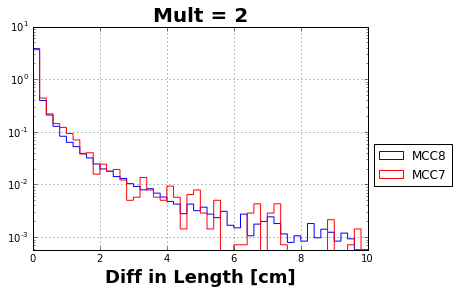

In [265]:
xmin = 0
xmax = 10

plt.figure()
_ = plt.hist(df_mult2.len_diff.values,bins=50,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=1,label='MCC8',range=(xmin,xmax))
_ = plt.hist(dfmcc7_mult2.len_diff.values,bins=50,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=1,label='MCC7',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,10)
plt.xlabel('Diff in Length [cm]',fontsize=18,weight='bold')


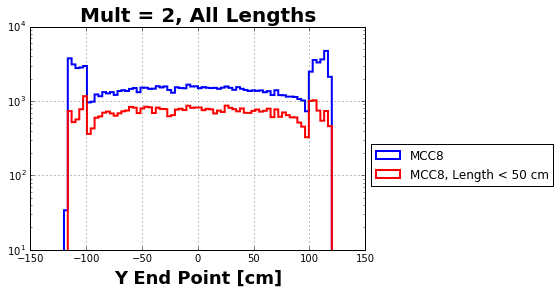

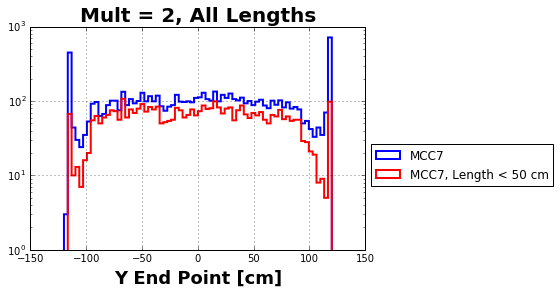

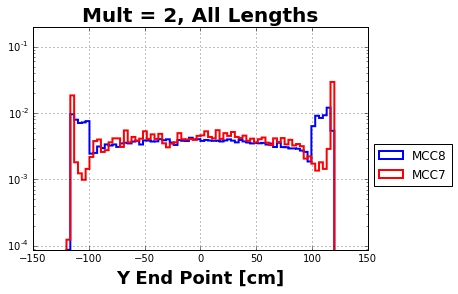

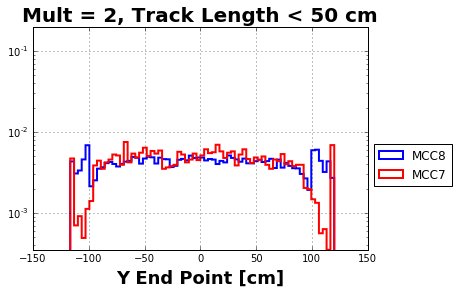

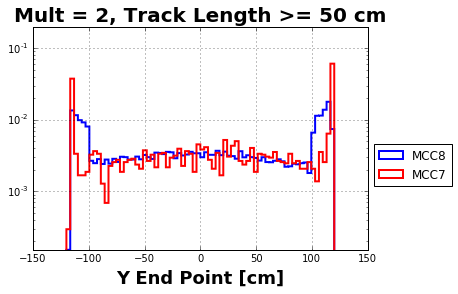

In [272]:
xmin = -120
xmax = 120

plt.figure()
_ = plt.hist(df_mult2.end_y.values,bins=70,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(xmin,xmax))
_ = plt.hist(df_mult2lowlen.end_y.values,bins=70,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC8, Length < 50 cm',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2, All Lengths',fontsize=20,weight='bold')
plt.yscale('log')
#plt.ylim(0,0.2)
plt.xlabel('Y End Point [cm]',fontsize=18,weight='bold')

plt.figure()
_ = plt.hist(dfmcc7_mult2.end_y.values,bins=70,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC7',range=(xmin,xmax))
_ = plt.hist(dfmcc7_mult2lowlen.end_y.values,bins=70,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7, Length < 50 cm',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2, All Lengths',fontsize=20,weight='bold')
plt.yscale('log')
#plt.ylim(0,0.2)
plt.xlabel('Y End Point [cm]',fontsize=18,weight='bold')


plt.figure()
_ = plt.hist(df_mult2.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(xmin,xmax))
_ = plt.hist(dfmcc7_mult2.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2, All Lengths',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Y End Point [cm]',fontsize=18,weight='bold')

plt.figure()
_ = plt.hist(df_mult2lowlen.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(xmin,xmax))
_ = plt.hist(dfmcc7_mult2lowlen.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2, Track Length < 50 cm',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Y End Point [cm]',fontsize=18,weight='bold')


plt.figure()
_ = plt.hist(df_mult2highlen.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(xmin,xmax))
_ = plt.hist(dfmcc7_mult2highlen.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2, Track Length >= 50 cm',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Y End Point [cm]',fontsize=18,weight='bold')


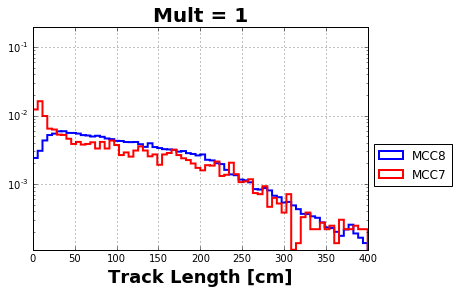

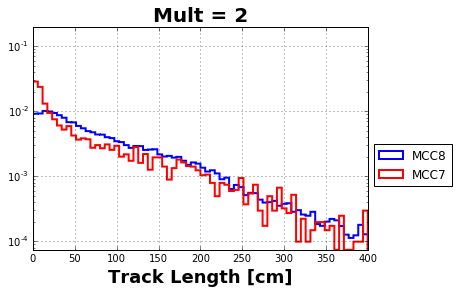

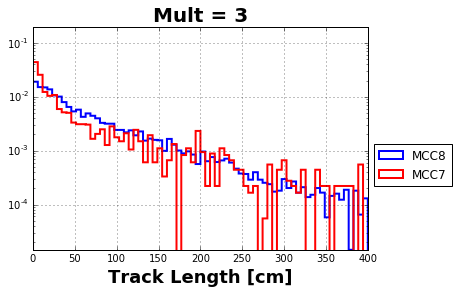

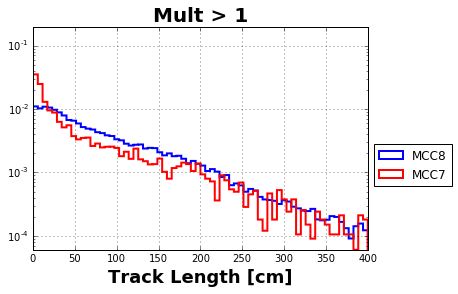

In [188]:
plt.figure()
_ = plt.hist(df_mult1.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(0,400))
_ = plt.hist(dfmcc7_mult1.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(0,400))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 1',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Track Length [cm]',fontsize=18,weight='bold')

plt.figure()
_ = plt.hist(df_mult2.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(0,400))
_ = plt.hist(dfmcc7_mult2.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(0,400))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Track Length [cm]',fontsize=18,weight='bold')

plt.figure()
_ = plt.hist(df_mult3.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(0,400))
_ = plt.hist(dfmcc7_mult3.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(0,400))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 3',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Track Length [cm]',fontsize=18,weight='bold')

plt.figure()
_ = plt.hist(df_multgt1.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(0,400))
_ = plt.hist(dfmcc7_multgt1.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(0,400))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult > 1',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Track Length [cm]',fontsize=18,weight='bold')

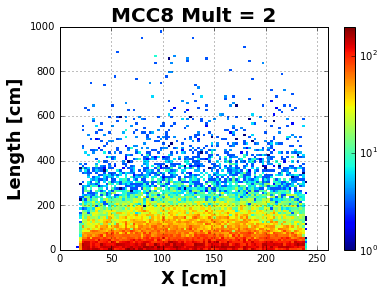

In [180]:
plt.figure()
_ = plt.hist2d(df_mult2.start_x,df_mult2.len,bins=100,range=[(0,260),(0,1000)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('MCC8 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('X [cm]',fontsize=18,weight='bold')
plt.ylabel('Length [cm]',fontsize=18,weight='bold')
#plt.axhline(-100,color='k',lw=3)
plt.colorbar()

plt.figure()

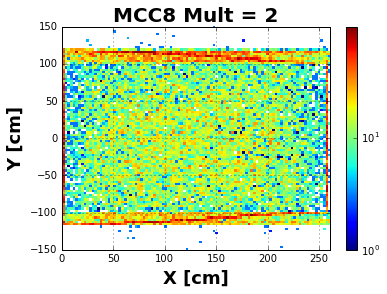

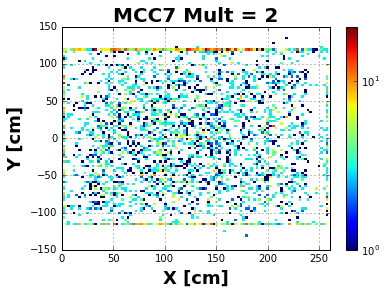

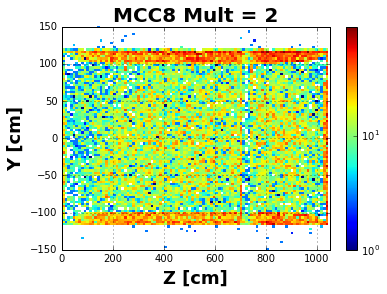

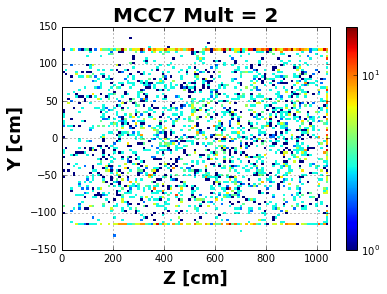

In [176]:
plt.figure()
_ = plt.hist2d(df_mult2.end_x,df_mult2.end_y,bins=100,range=[(0,260),(-150,150)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('MCC8 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('X [cm]',fontsize=18,weight='bold')
plt.ylabel('Y [cm]',fontsize=18,weight='bold')
#plt.axhline(-100,color='k',lw=3)
plt.colorbar()

plt.figure()
_ = plt.hist2d(dfmcc7_mult2.end_x,dfmcc7_mult2.end_y,bins=100,range=[(0,260),(-150,150)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('MCC7 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('X [cm]',fontsize=18,weight='bold')
plt.ylabel('Y [cm]',fontsize=18,weight='bold')
#plt.axhline(-100,color='k',lw=3)
plt.colorbar()

plt.figure()
_ = plt.hist2d(df_mult2.end_z,df_mult2.end_y,bins=100,range=[(0,1050),(-150,150)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('MCC8 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('Z [cm]',fontsize=18,weight='bold')
plt.ylabel('Y [cm]',fontsize=18,weight='bold')
plt.colorbar()

plt.figure()
_ = plt.hist2d(dfmcc7_mult2.end_z,dfmcc7_mult2.end_y,bins=100,range=[(0,1050),(-150,150)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('MCC7 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('Z [cm]',fontsize=18,weight='bold')
plt.ylabel('Y [cm]',fontsize=18,weight='bold')
plt.colorbar()
#plt.axhline(-100,color='k',lw=3)

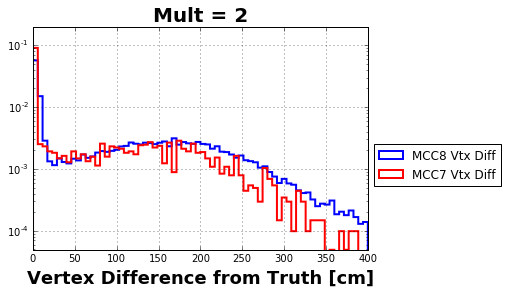

In [190]:
from matplotlib.colors import LogNorm

plt.figure()
v8,b8,_ = plt.hist(df_mult2.vtxdiff.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8 Vtx Diff',range=(0,400))
v7,b7,_ = plt.hist(dfmcc7_mult2.vtxdiff.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7 Vtx Diff',range=(0,400))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')

In [197]:
print np.cumsum(v8)[2]/np.cumsum(v8)[-1]
print np.cumsum(v7)[2]/np.cumsum(v7)[-1]

0.42711421714
0.545121263395


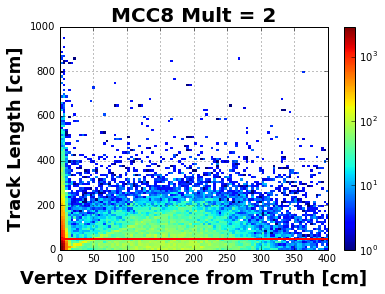

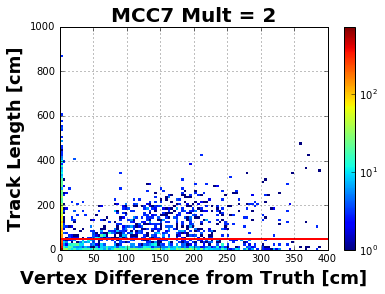

In [161]:
plt.figure()
_ = plt.hist2d(df_mult2.vtxdiff,df_mult2.len,bins=100,range=[(0,400),(0,1000)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('MCC8 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(50,color='r',lw=2)

plt.figure()
_ = plt.hist2d(dfmcc7_mult2.vtxdiff,dfmcc7_mult2.len,bins=100,range=[(0,400),(0,1000)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('MCC7 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(50,color='r',lw=2)


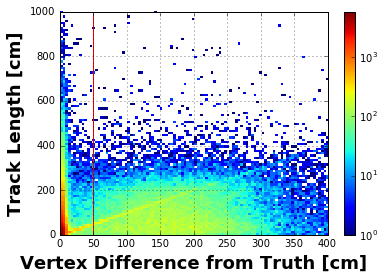

In [126]:
from matplotlib.colors import LogNorm

plt.figure()
_ = plt.hist2d(df.vtxdiff,df.len,bins=100,range=[(0,400),(0,1000)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axvline(50,color='r')

nbins=100

#H, xedges, yedges = np.histogram2d(df.len,df.vtxdiff,bins=nbins,range=[(0,1500),(0,100)])
#Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

#plt.pcolormesh(yedges,xedges,Hmasked)


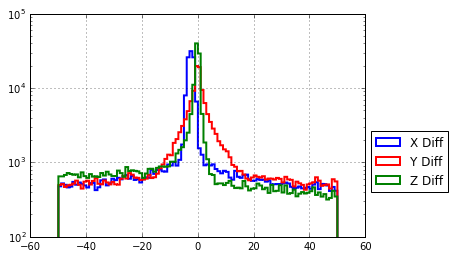

In [37]:
r = 50
plt.figure()
_ =plt.hist(df.mc_vtx_x - df.reco_vtx_x,bins=100,histtype='step',fill=None,edgecolor='b',lw=2,label='X Diff',range=(-r,r))
_ =plt.hist(df.mc_vtx_y - df.reco_vtx_y,bins=100,histtype='step',fill=None,edgecolor='r',lw=2,label='Y Diff',range=(-r,r))
_ =plt.hist(df.mc_vtx_z - df.reco_vtx_z,bins=100,histtype='step',fill=None,edgecolor='g',lw=2,label='Z Diff',range=(-r,r))
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.axvline(0,color='r',lw=2)
plt.yscale('log')